In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read("/Users/athib/Desktop/CovidRSV/scRNA2/HarmonyCorrected.h5ad")

In [7]:
sc.set_figure_params(dpi=100, color_map = 'viridis')
sc.settings.verbosity = 3

In [4]:
erythroblast = adata[adata.obs['C13_Annotation'].isin(['0', '6'])].copy()
sc.pp.neighbors(erythroblast, use_rep="X_pca_harmony")
sc.tl.umap(erythroblast)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [5]:
sc.tl.leiden(erythroblast)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


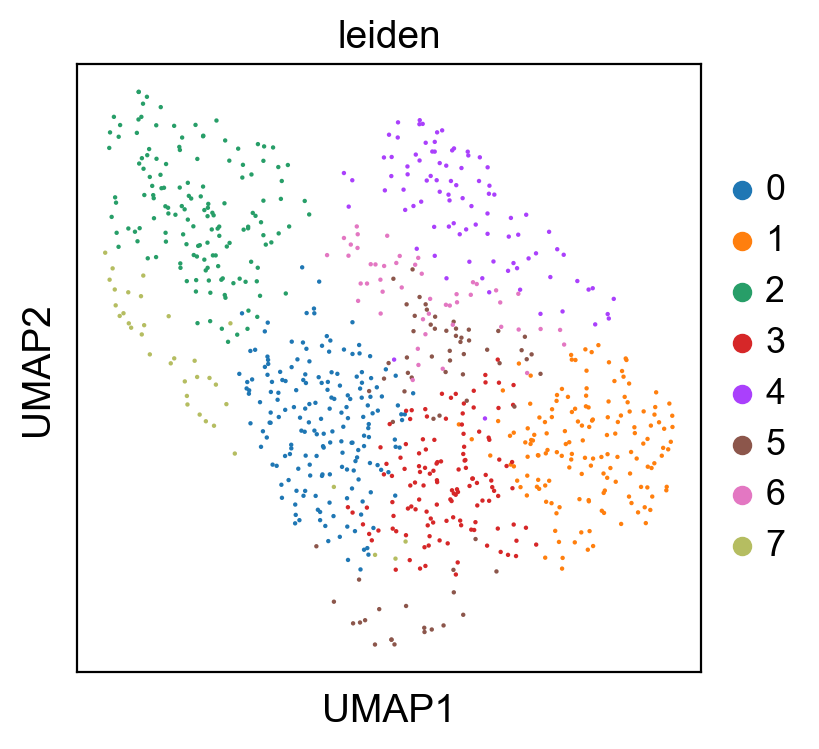

In [8]:
sc.pl.umap(erythroblast, color=['leiden'], size=10, add_outline=False)


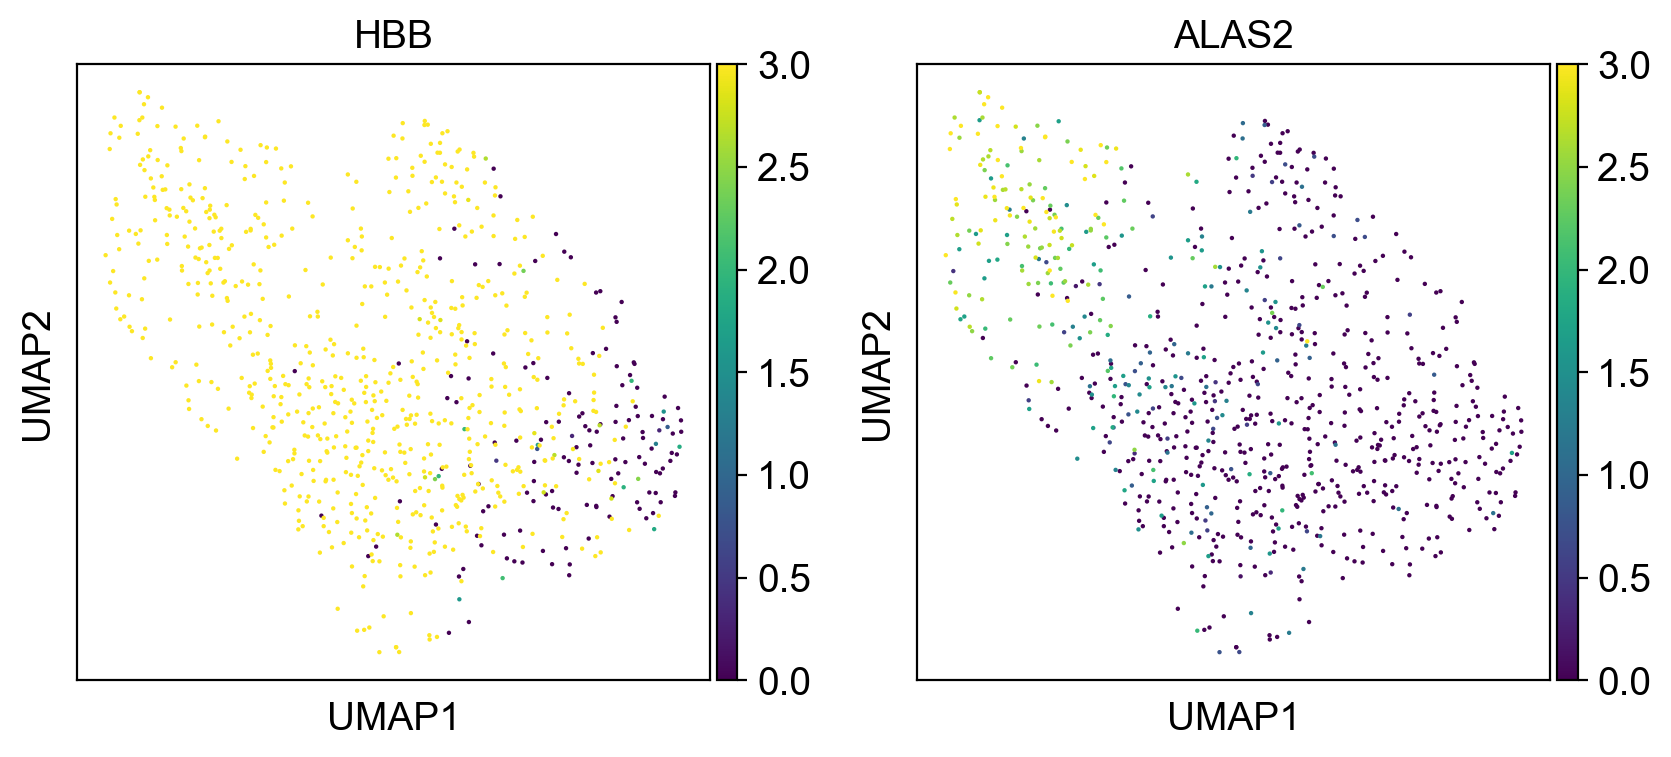

In [9]:
sc.pl.umap(erythroblast, color=['HBB', 'ALAS2'], size=10, add_outline=False, vmax=3)


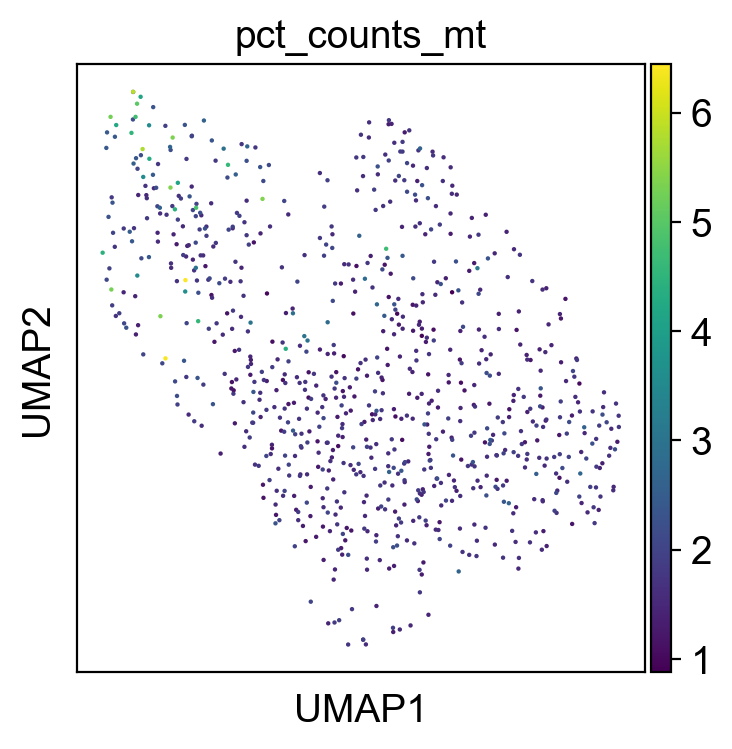

In [10]:
sc.pl.umap(erythroblast, color=['pct_counts_mt'], size=10, add_outline=False)


In [11]:
markerdict = dict()

markerdict["T"] = ["CD3E","CD3D", "CD3G"]
markerdict["Naive T"] = ["LEF1","IL7R"]
markerdict["CD4"] = ["CD4"]
markerdict["CD8"] = ["CD8A", "CD8B"]
markerdict["TREG"] = ["FOXP3"]
markerdict["γδ T"] = ["TRDC","TRGC2"]
markerdict["MAIT"] = ["KLRB1"]
markerdict["NK"] = ["NKG7", "NCAM1"]
markerdict["B"] = ["MS4A1", "CD79A"]
markerdict["PCs"] = ["JCHAIN", "MZB1", "TNFRSF17"]
markerdict["pDCs"] = ["IRF7", "TCF4"]
markerdict["Myeloid"] = ["LYZ"]
markerdict["CD14"] = ["CD14"]
markerdict["CD16"] = ["FCGR3A"]
markerdict["DC"] = ["CD1C", "CST3", "FCER1G"]
markerdict["MGK"] = ["PPBP","PF4"]
markerdict["RBC"] = ["HBB"]
markerdict["HSC"] = ["CD34"]
markerdict["Eryth"] = ["ALAS2"]
markerdict["Prolif"] = ["MKI67"]
markerdict["HSC"] = ["CD34"]
markerdict["ISG"] = ["IFI44L", "ISG15", "IFI6", "IFI27", "IFI44"]


In [12]:
sc.tl.dendrogram(erythroblast, groupby='leiden')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


categories: 0, 1, 2, etc.
var_group_labels: T, Naive T, CD4, etc.


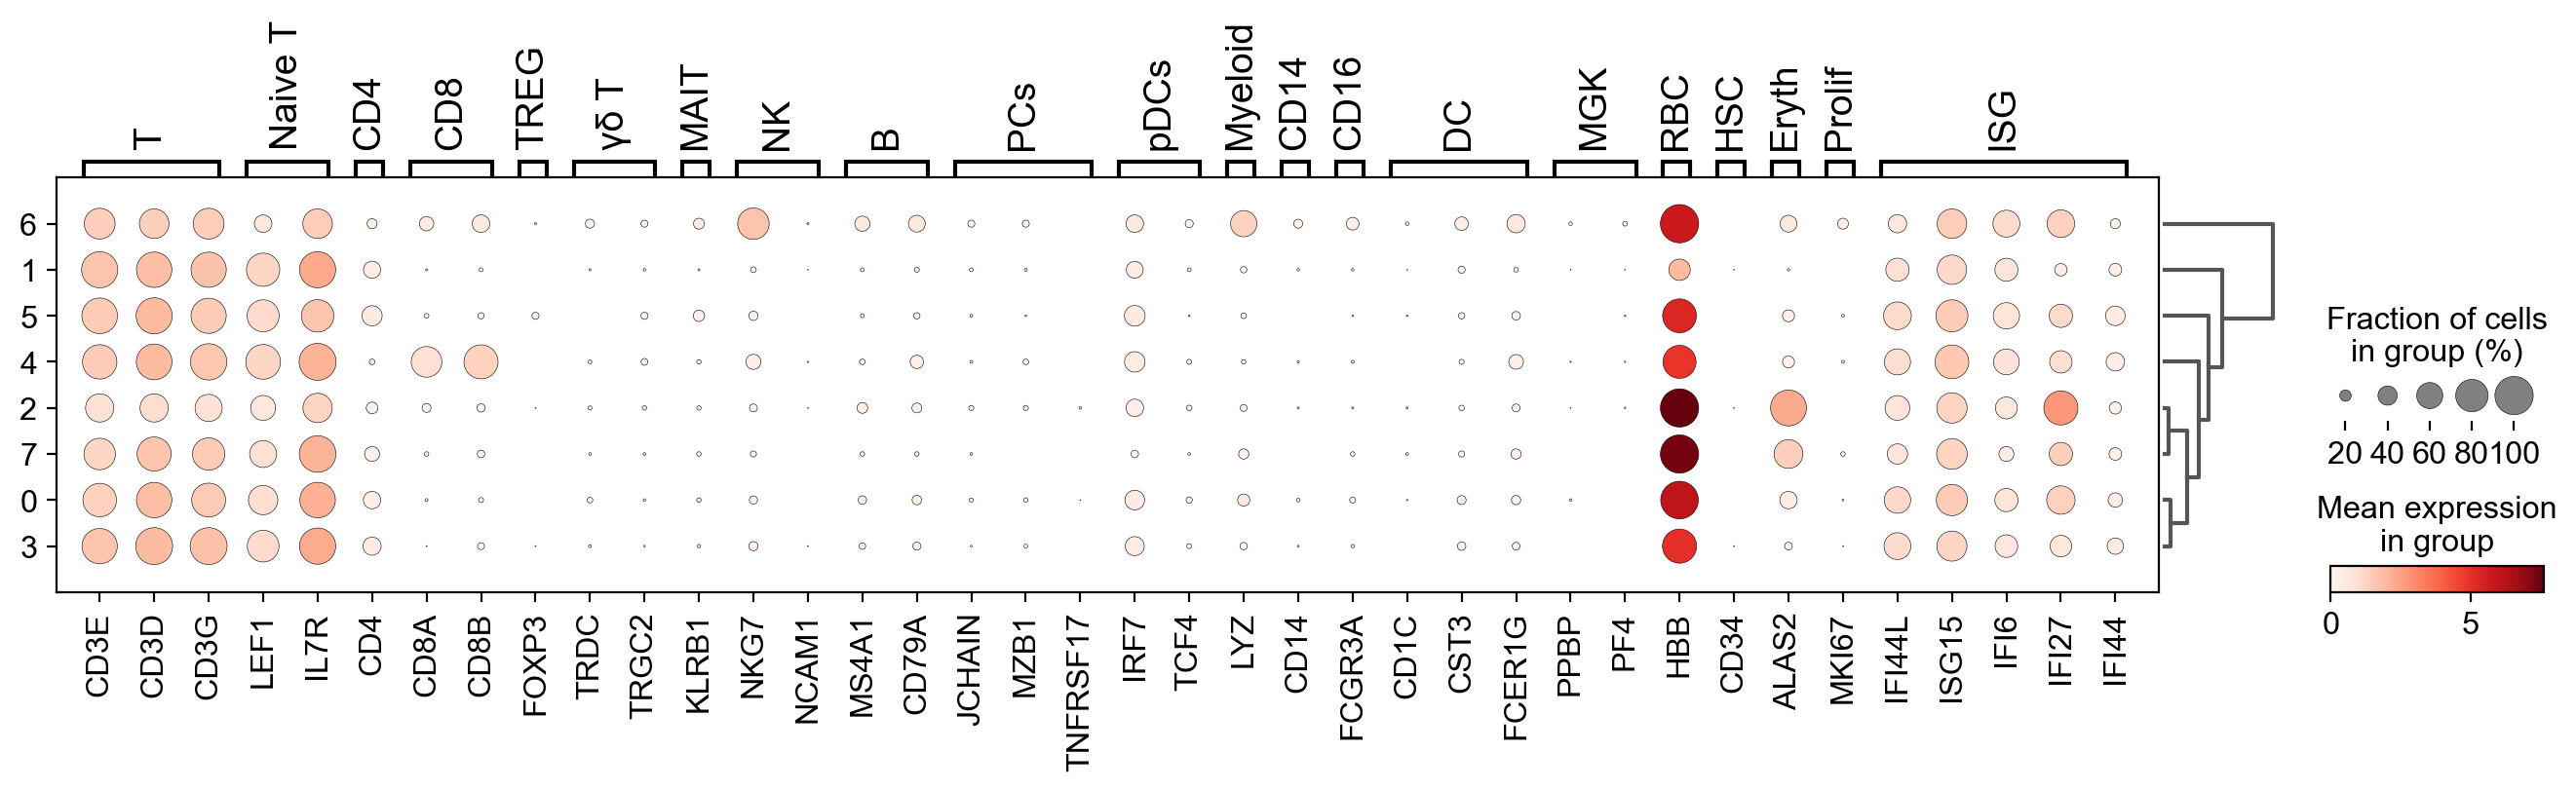

In [13]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.dotplot(erythroblast, markerdict,  
                  groupby='leiden', dendrogram=True);

In [14]:
sum(erythroblast.obs['leiden'] == '2')

147

In [15]:
sum(erythroblast.obs['leiden'] == '7')

35

In [16]:
erythroblast.obs['Erythroblast'] = np.array((erythroblast.raw[:,'{}'.format('ALAS2')].X.todense() > 0), dtype=int)


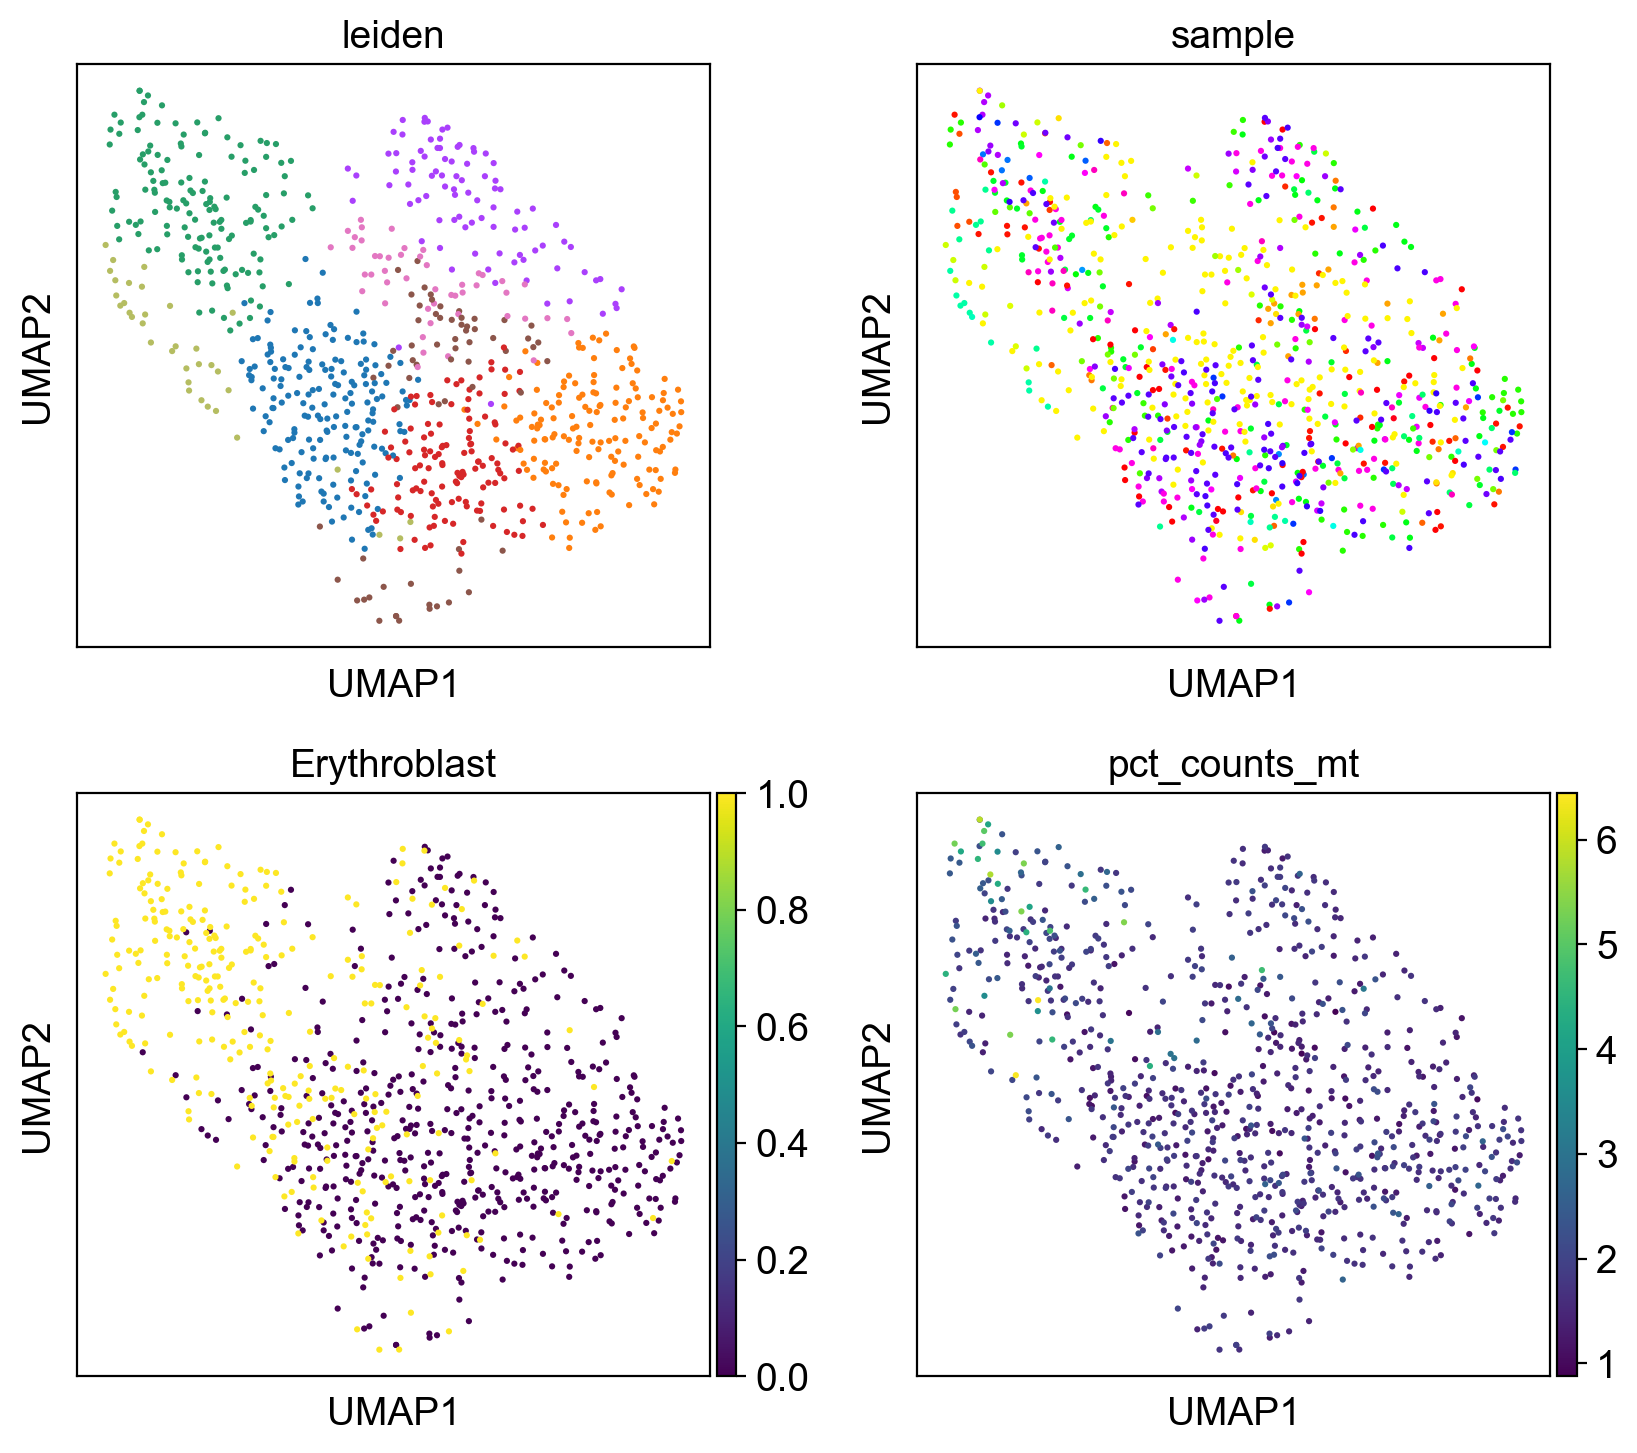

In [17]:
sc.pl.umap(erythroblast, color=['leiden', 'sample', 'Erythroblast', 'pct_counts_mt'], ncols=2, size=20, add_outline=False, legend_loc=None)


In [18]:
sum(erythroblast.obs['leiden'].isin(['2','7']))

182

In [19]:
sum(erythroblast.obs['leiden'].isin(['2','7']) & (erythroblast.obs['Erythroblast']))

159

# Summary
Majority of cells in clusters 2 and 7 have ALAS2 expression.
Erythroblasts will be selected based on clusters 2 and 7.

In [20]:
barcodes = erythroblast.obs.index
barcodes = barcodes[erythroblast.obs['leiden'].isin(['2', '7'])]
#pd.DataFrame(barcodes).to_csv("Eryth_Barcodes.txt", header=None, index=None)